In [1]:
import os
path = "/Users/patricia/Documents/code/python-code/behavior-detection/src"
os.chdir(path)

from core.preprocessors.data_loader import DataLoader

# Load data
file_path = '../data/new_logs_labels.csv'
df = DataLoader.load_data(file_path, delimiter=';')

In [2]:
df.head()

,id_log,aluno,grupo,num_dia,num_log,log_type,ultimo_passo_correto,verificado_com_mouse,verificado_com_teclado,idle_time_acumulado,...,comportamento_off_task,comportamento_on_system,comportamento_indefinido,ultimo_comportamento,ultimo_comportamento_on_task,ultimo_comportamento_on_task_conversation,ultimo_comportamento_on_task_out,ultimo_comportamento_off_task,ultimo_comportamento_on_system,ultimo_comportamento_indefinido
0,8224,1,2,1,1,step_verification,0,0,1,0,...,0,0,0,?,0,0,0,0,0,1
1,527786,1,2,1,2,user_idle,1,0,0,2,...,0,0,0,ON TASK,1,0,0,0,0,0
2,527787,1,2,1,3,user_idle,0,0,0,4,...,0,0,0,ON TASK,1,0,0,0,0,0
3,527788,1,2,1,4,user_idle,0,0,0,6,...,0,0,0,ON TASK,1,0,0,0,0,0
4,527789,1,2,1,5,user_idle,0,0,0,8,...,0,0,0,ON TASK,1,0,0,0,0,0


In [ ]:
# !pip install ydata-profiling

In [3]:
def listar_features_constantes(df):
    # Encontrar colunas onde todos os valores são iguais
    features_constantes = [col for col in df.columns if df[col].nunique() == 1]

    return features_constantes

features_constantes = listar_features_constantes(df)
print(f"Features constantes: {features_constantes}")

# Remover as colunas constantes
df_limpo = df.drop(columns=features_constantes)

print(f"Removidas {len(features_constantes)} features constantes")
print(f"Shape original: {df.shape}")
print(f"Novo shape: {df_limpo.shape}")


Features constantes: ['type_window_resize', 'type_start_out_of_sinc_server_time', 'type_user_log_out', 'click_atalhos', 'click_bugs', 'click_indefinidos', 'cat_facil_2', 'cat_dificil_4', 'eq_DV', 'eq_DV_acerto_clip', 'eq_DV_acerto_diario', 'eq_DV_acerto_total', 'eq_DV_acerto_medio_diario_turma', 'eq_DV_acerto_medio_total_turma', 'eq_AF_erro_clip', 'eq_MF_erro_clip', 'eq_MM_erro_clip', 'eq_AF_erro_diario', 'eq_MF_erro_diario', 'eq_AF_erro_total', 'eq_MF_erro_total', 'eq_AF_erro_medio_diario_turma', 'eq_MF_erro_medio_diario_turma', 'eq_AF_erro_medio_total_turma', 'eq_MF_erro_medio_total_turma', 'eq_DV_fator_clip', 'eq_DV_fator_diario', 'eq_DV_fator_total', 'eq_DV_fator_medio_diario_turma', 'eq_DV_fator_medio_total_turma', 'misc_EqPrim_Ad_Inc_clip', 'misc_OI_Dv_Plus_Dv_Minus_clip', 'misc_OI_Mt_Minus_Ad_clip', 'misc_OI_Mt_Plus_Mt_Plus_clip', 'misc_OI_Dv_Plus_Dv_Plus_clip', 'misc_OI_Mt_Plus_Dv_Minus_clip', 'misc_OI_Mt_Plus_Ad_clip', 'misc_OI_Dv_Minus_Dv_Plus_clip', 'misc_OI_Mt_Plus_Sb_clip'

In [4]:
def listar_features_baixa_variancia(df, threshold=0.95):
    # Encontrar colunas onde a proporção do valor mais frequente é maior ou igual ao limiar
    features_baixa_variancia = [col for col in df.columns if df[col].value_counts(normalize=True).max() >= threshold]

    return features_baixa_variancia


features_quase_constantes = listar_features_baixa_variancia(df_limpo)
print(f"Features quase constantes: {features_quase_constantes}")

Features quase constantes: ['verificado_com_mouse', 'type_typing', 'type_mouse_fast', 'type_hint_request', 'type_window_lost_focus', 'type_window_gained_focus', 'type_left_window', 'type_entered_window', 'click_planos', 'click_gamificacao', 'click_dicas', 'click_erros', 'click_notificacoes', 'click_sistema', 'click_emocoes', 'cat_facil_3', 'cat_facil_4', 'cat_dificil_2', 'cat_dificil_3', 'eq_MF', 'eq_OI', 'eq_AD_acerto_clip', 'eq_AF_acerto_clip', 'eq_DM_acerto_clip', 'eq_MF_acerto_clip', 'eq_MM_acerto_clip', 'eq_SB_acerto_clip', 'eq_SP_acerto_clip', 'eq_AF_acerto_diario', 'eq_MF_acerto_diario', 'eq_AD_erro_clip', 'eq_DM_erro_clip', 'eq_DV_erro_clip', 'eq_MT_erro_clip', 'eq_OI_erro_clip', 'eq_SB_erro_clip', 'eq_SP_erro_clip', 'eq_MM_erro_diario', 'eq_MM_erro_total', 'eq_AD_fator_clip', 'eq_AF_fator_clip', 'eq_DM_fator_clip', 'eq_MF_fator_clip', 'eq_MM_fator_clip', 'eq_SB_fator_clip', 'eq_SP_fator_clip', 'eq_AF_fator_diario', 'eq_MF_fator_diario', 'misc_EqPrim_Ad_Sin_clip', 'misc_EqPrim_

In [5]:
# Remover as colunas constantes
df_limpo = df_limpo.drop(columns=features_quase_constantes)

print(f"Removidas {len(features_quase_constantes)} features quase constantes")
print(f"Novo shape: {df_limpo.shape}")

Removidas 76 features quase constantes
Novo shape: (5525, 237)


In [6]:
# Verificar valores únicos e a quantidade de cada um nas colunas especificadas
colunas = ['grupo', 'aluno', 'num_dia']
for coluna in colunas:
    print(f"Valores únicos e listagem para a coluna '{coluna}':")
    print(df[coluna].nunique())
    value_counts = df[coluna].value_counts().sort_index().to_dict()
    formatted_value_counts = ', '.join([f"{k}({v})" for k, v in value_counts.items()])
    print(f"{{{formatted_value_counts}}}")
    print("\n")

Valores únicos e listagem para a coluna 'grupo':
10
{1(553), 2(525), 3(651), 4(536), 5(535), 6(510), 7(525), 8(561), 9(554), 10(575)}


Valores únicos e listagem para a coluna 'aluno':
30
{1(184), 2(188), 3(191), 4(173), 5(181), 6(167), 7(202), 8(164), 9(188), 10(189), 11(283), 12(186), 13(186), 14(185), 15(145), 16(205), 17(183), 18(188), 19(158), 20(192), 21(185), 22(177), 23(214), 24(159), 25(149), 26(166), 27(195), 28(182), 29(161), 30(199)}


Valores únicos e listagem para a coluna 'num_dia':
10
{1(563), 2(521), 3(554), 4(658), 5(516), 6(576), 7(535), 8(550), 9(510), 10(542)}




In [7]:
def count_group_of_two_columns(df, column1, column2):
    grouped = df.groupby([column1, column2]).size()
    filtered_grouped = grouped[grouped != 1]
    count_of_ones = (grouped == 1).sum()
    
    print("Exibindo os grupos de pares formado pelas colunas '{}' e '{}' cujo tam é != 1".format(column1, column2))
    print(filtered_grouped)
    print("\nQuantidade de grupos cuja contagem é 1: {}".format(count_of_ones))

In [8]:
count_group_of_two_columns(df, 'aluno', 'num_log')

Exibindo os grupos de pares formado pelas colunas 'aluno' e 'num_log' cujo tam é != 1
Series([], dtype: int64)

Quantidade de grupos cuja contagem é 1: 5525


In [9]:
from typing import List
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_heatmap(df, figsize=(15, 12)):
    """
    Plota o heatmap da matriz de correlação para as colunas numéricas do DataFrame.
    
    Parâmetros:
      - df: DataFrame já carregado.
      - figsize: Tamanho da figura.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Heatmap da Matriz de Correlação')
    plt.show()


def get_highly_correlated_features(df: pd.DataFrame,
                                   target_column: str = 'target',
                                   threshold: float = 0.90) -> List[str]:
    """
    Returns a list of features to remove based on correlation analysis,
    keeping one feature from each highly correlated pair and excluding the target variable.
    
    Args:
        df: Input DataFrame
        target_column: Name of the dependent variable to exclude
        threshold: Correlation threshold (default: 0.90)
    
    Returns:
        List of column names recommended for removal
    
    Example:
        >>> df = pd.DataFrame({'target': [1,2,3], 'f1': [1,2,3], 'f2': [1,2,3], 'f3': [4,5,6]})
        >>> get_highly_correlated_features(df, 'target', 0.90)
        ['f2']  # f1 and f2 are correlated, f2 is selected for removal
    """
    # Remove target column and get numeric columns only
    features_df = df.drop(columns=[target_column]
                          ).select_dtypes(include=[np.number])

    # Calculate correlation matrix
    corr_matrix = features_df.corr()

    # Get upper triangle of correlations
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    # Initialize set of features to remove
    to_drop = set()

    # For each pair of features with correlation above threshold
    for i in range(len(upper_triangle.columns)):
        for j in range(i + 1, len(upper_triangle.columns)):
            if abs(upper_triangle.iloc[i, j]) > threshold:
                col_i = upper_triangle.columns[i]
                col_j = upper_triangle.columns[j]

                # Decide which feature to remove based on correlation with target
                # Here we keep the feature that has higher correlation with target
                target_corr_i = abs(df[col_i].corr(df[target_column]))
                target_corr_j = abs(df[col_j].corr(df[target_column]))

                if target_corr_i > target_corr_j:
                    to_drop.add(col_j)
                else:
                    to_drop.add(col_i)

    return list(to_drop)

def remove_highly_correlated_features(df, features_to_remove):
    """
    Retorna um novo DataFrame com as colunas indicadas removidas.
    
    Parâmetros:
      - df: DataFrame original.
      - features_to_remove: Lista de colunas a serem removidas.
      
    Retorna:
      - Novo DataFrame sem as colunas listadas.
    """
    df_reduced = df.drop(columns=features_to_remove)
    return df_reduced

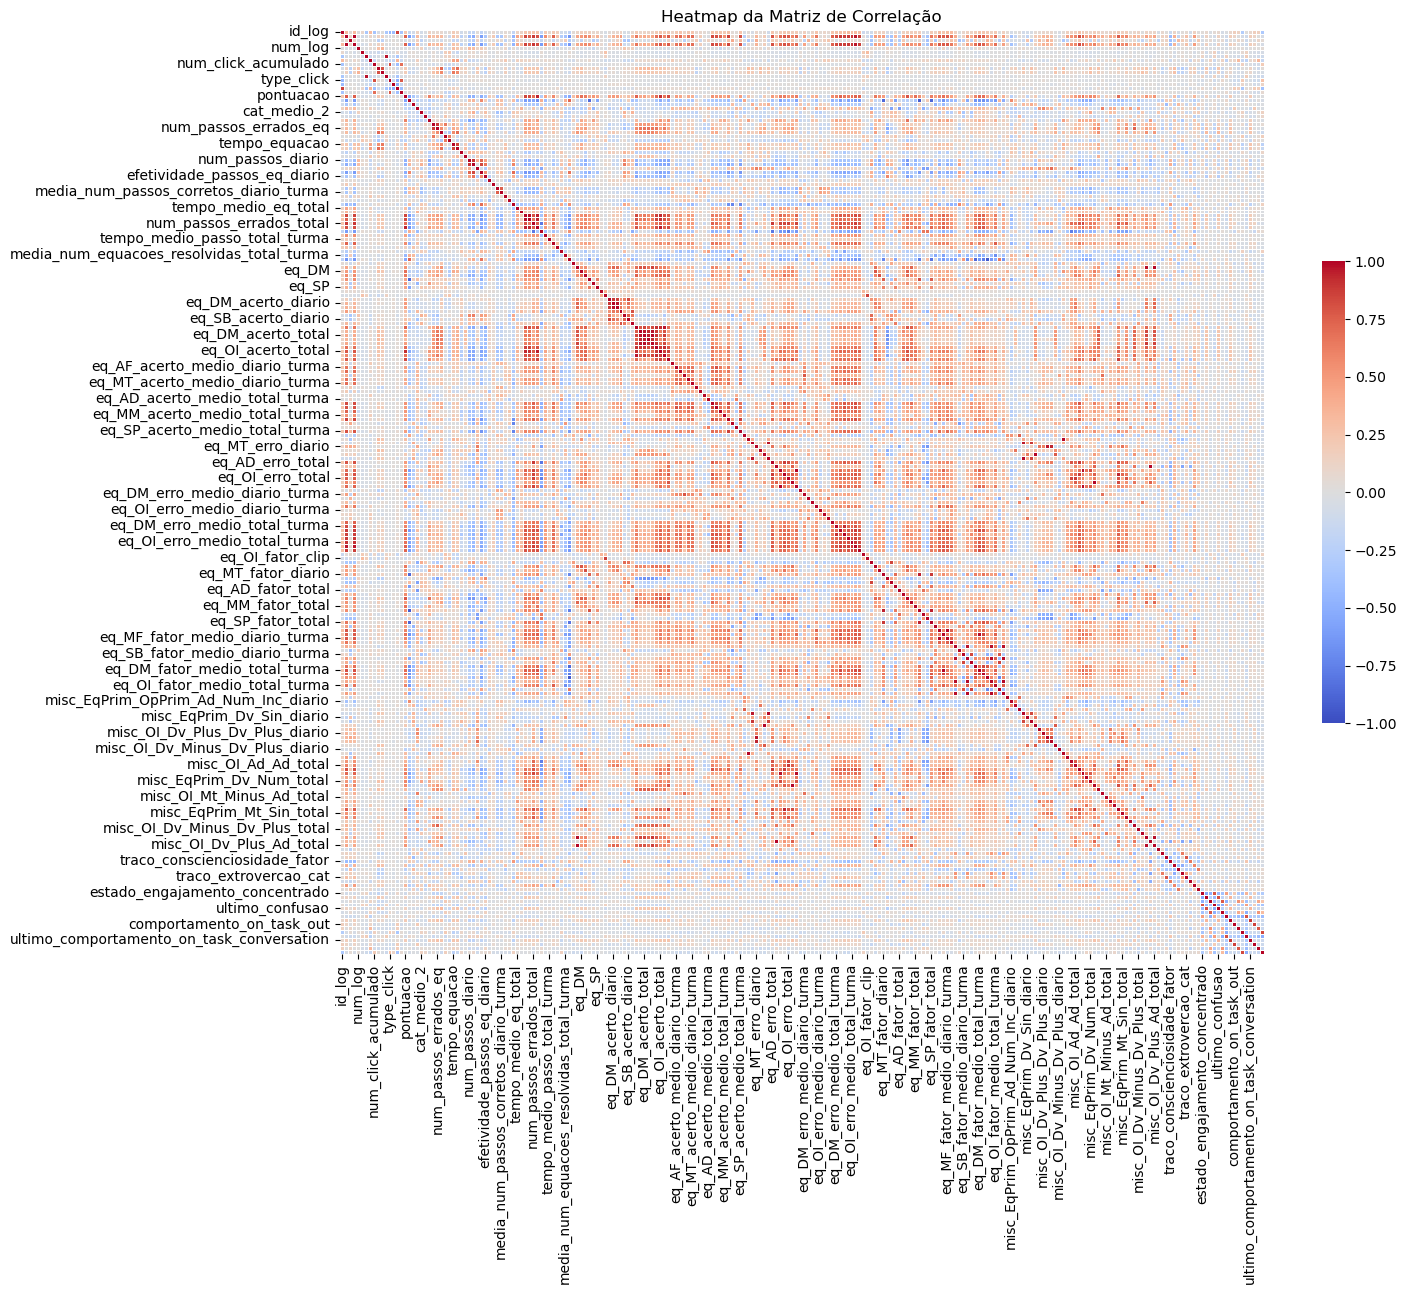


Colunas com correlação acima de 0.9:
['num_dia', 'type_step_verification', 'num_passos_corretos_diario', 'num_passos_corretos_total', 'num_equacoes_resolvidas_total', 'eq_MM_acerto_diario', 'eq_DM_acerto_total', 'eq_MF_acerto_total', 'eq_MM_acerto_total', 'eq_MT_acerto_total', 'eq_OI_acerto_total', 'eq_SB_acerto_total', 'eq_SP_erro_diario', 'eq_SP_erro_total', 'eq_MM_erro_medio_total_turma', 'eq_OI_erro_medio_total_turma', 'eq_SB_erro_medio_total_turma', 'eq_MT_fator_total', 'eq_SP_fator_total', 'eq_MF_fator_medio_diario_turma', 'eq_SP_fator_medio_diario_turma', 'eq_DM_fator_medio_total_turma', 'eq_MM_fator_medio_total_turma', 'eq_MT_fator_medio_total_turma', 'eq_SP_fator_medio_total_turma', 'misc_EqPrim_Dv_Simp_diario', 'misc_EqPrim_OpPrim_Sb_Num_Inc_diario', 'misc_EqPrim_Mt_Num_diario', 'misc_EqPrim_Mt_Sin_diario', 'misc_EqSec_Distrib_MtTerm_diario', 'misc_EqPrim_Dv_Simp_total', 'misc_EqPrim_OpPrim_Sb_Num_Inc_total', 'misc_EqPrim_Mt_Num_total', 'misc_OI_Dv_Plus_Sb_total', 'misc_EqSe

In [12]:
# --- Chamadas de exemplo no notebook ---
# Suponha que seu DataFrame já esteja carregado e seja chamado "df"


# 1. Visualize o heatmap da matriz de correlação:
plot_correlation_heatmap(df_limpo)

# 2. Identifique as variáveis altamente correlacionadas (por exemplo, correlação absoluta maior que 0.90):
threshold_value = 0.90
cols_to_remove = get_highly_correlated_features(df_limpo, threshold=threshold_value)
print(f"\nColunas com correlação acima de {threshold_value}:")
print(cols_to_remove)

# 3. Remova as colunas identificadas e visualize o novo shape do DataFrame:
df_reduced = remove_highly_correlated_features(df_limpo, cols_to_remove)
print("\nShape original:", df_limpo.shape)
print("Shape após remoção:", df_reduced.shape)

In [10]:
from ydata_profiling import ProfileReport
from datetime import datetime

def analyze_dataframe(df):
    """
    Generates a comprehensive EDA report for behavior detection data.

    Args:
        df: DataFrame with behavior data
        output_dir: Directory to save the report
    """


    profile = ProfileReport(df, title="Dataset Analysis Report",
                            minimal=False,
                            correlations={
                                "pearson": {"calculate": True},
                                "spearman": {"calculate": True},
                                "kendall": {"calculate": True},
                                "phi_k": {"calculate": True},
                            })
    return profile

In [11]:
# Generate the profile report
profile = analyze_dataframe(df_limpo)

# Create a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f'../../output/dataset_report_{timestamp}.html'

# Save the profile report to a file
profile.to_file(file_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/anaconda3/envs/projetos_ML/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/opt/anaconda3/envs/projetos_ML/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/opt/anaconda3/envs/projetos_ML/lib/python3.11/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]